<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Прямое-кодирование-признаков" data-toc-modified-id="Прямое-кодирование-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Прямое кодирование признаков</a></span></li><li><span><a href="#Формирование-выборок" data-toc-modified-id="Формирование-выборок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Формирование выборок</a></span></li><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Стандартизация данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Параметр-class_weight-=-'balanced'" data-toc-modified-id="Параметр-class_weight-=-'balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Параметр class_weight = 'balanced'</a></span></li><li><span><a href="#Техника-Upsampling" data-toc-modified-id="Техника-Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Техника Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Визуализация-AUC-ROC" data-toc-modified-id="Визуализация-AUC-ROC-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Визуализация AUC-ROC</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#ВЫВОД" data-toc-modified-id="ВЫВОД-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ВЫВОД</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Общая информация

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install scikit-learn==1.1.3
from sklearn.preprocessing import OneHotEncoder
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import StandardScaler
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix, 
    f1_score,
    roc_curve,
    mean_squared_error, 
    roc_auc_score
)

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


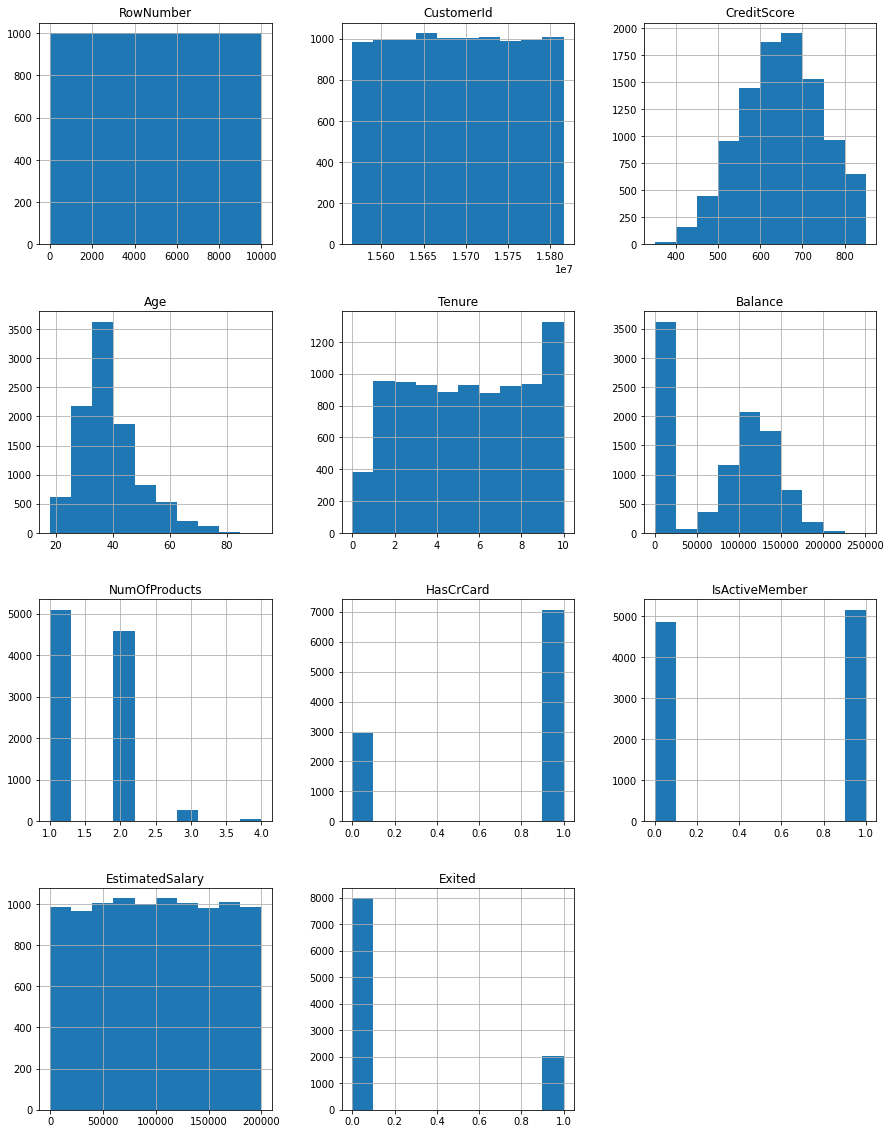

In [4]:
data.hist(figsize=(15, 20));

***Вывод:*** распределения выглядят адекватно, аномалий не обнаружено.

In [5]:
data.duplicated().sum()

0

In [6]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean())

***Вывод:***  с типами данных все в порядке, пропуски имеются только в столбце "Tenure", пропуски заполним медианным значением; явных дубликатов не выялено.

Посмотрим коррелицию между фактом ухода клиента (целевой признак) и остальными признаками.

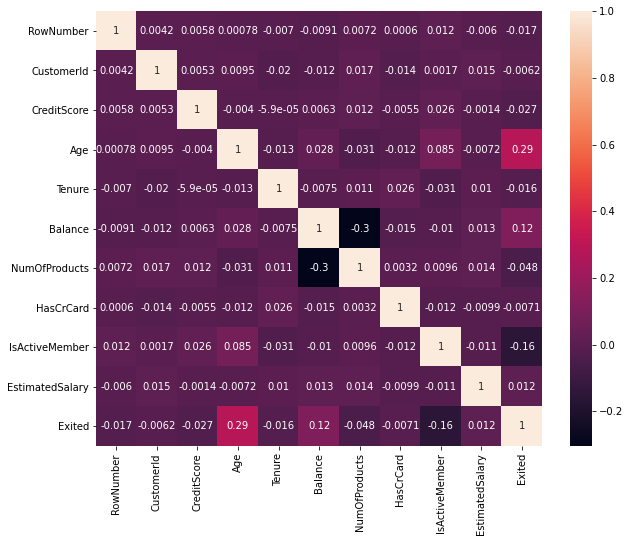

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True);

***Вывод:*** наблюдается дисбаланс классов по факту ухода клиента из банк, что может помешать моделе правильно определять класс; значимых корреляций мужду целевым признаком и признаками не выявлено.

Чтобы неперегружать модели при обучении, удалим следующие столбцы из таблицы: 'RowNumber','CustomerId','Surname'. Они не представляют ценности т.к. не могут повлиять на факт ухода клиента из банка.

In [8]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

### Прямое кодирование признаков

Преобразуем категориальные признаки в численные техникой прямого кодирования (One-Hot Encoding).

### Формирование выборок

Сформируем тренировочную, валидационную и тестовую выбрки.

In [10]:
f_train, t_train, f_valid, t_valid, f_test, t_test = train_valid_test_split(data, target='Exited', 
                                                                            train_size=0.7, valid_size=0.15,
                                                                            test_size=0.15, random_state=12345)

print(f_train.shape, f_valid.shape, f_test.shape)
t_train.shape, t_valid.shape, t_test.shape
f_train.head()

(7000, 10) (1500, 10) (1500, 10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9716,812,Germany,Male,39,5.0,115730.71,3,1,1,185599.34
224,671,Germany,Male,45,6.0,99564.22,1,1,1,108872.45
589,519,Spain,Female,47,6.0,157296.02,2,0,0,147278.43
7507,576,Germany,Male,44,9.0,119530.52,1,1,0,119056.68
1457,850,France,Male,66,4.0,0.00,2,0,1,64350.80


In [11]:
# преобразуем категориальные признаки в численные техникой прямого кодирования
encoder = OneHotEncoder(handle_unknown='error', drop='first', sparse=False)

ohe_features = ['Geography', 'Gender']

encoder.fit(f_train[ohe_features])

f_train[
    encoder.get_feature_names_out()
] = encoder.transform(f_train[ohe_features])

# удаляем незакодированные категориальные признаки (изначальные колонки)
f_train = f_train.drop(ohe_features, axis=1)
f_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9716,812,39,5.0,115730.71,3,1,1,185599.34,1.0,0.0,1.0
224,671,45,6.0,99564.22,1,1,1,108872.45,1.0,0.0,1.0
589,519,47,6.0,157296.02,2,0,0,147278.43,0.0,1.0,0.0
7507,576,44,9.0,119530.52,1,1,0,119056.68,1.0,0.0,1.0
1457,850,66,4.0,0.00,2,0,1,64350.80,0.0,0.0,1.0


In [12]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем валидационнцю и тестовую
#валидационная
f_valid[
    encoder.get_feature_names_out()
] = encoder.transform(f_valid[ohe_features])

f_valid = f_valid.drop(ohe_features, axis=1)
# тестовая
f_test[
    encoder.get_feature_names_out()
] = encoder.transform(f_test[ohe_features])

f_test = f_test.drop(ohe_features, axis=1)

In [13]:
print('Валидационная выборка:')
display(f_valid.head())
print('Тестовая выборка:')
f_test.head()

Валидационная выборка:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9116,562,62,3.00000,0.00,2,1,0,105986.01,0.0,0.0,1.0
9733,733,64,3.00000,0.00,2,1,1,75272.63,0.0,0.0,1.0
6662,665,36,1.00000,0.00,2,0,1,121505.61,0.0,0.0,1.0
7680,808,25,4.99769,0.00,2,0,1,23180.37,0.0,1.0,1.0
7515,623,35,0.00000,130557.24,1,1,1,47880.71,0.0,0.0,0.0


Тестовая выборка:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8606,807,42,5.0,0.00,2,1,1,74900.90,0.0,1.0,1.0
8794,706,29,1.0,209490.21,1,1,1,133267.69,0.0,1.0,0.0
2210,673,34,1.0,127122.79,3,0,1,76703.10,1.0,0.0,0.0
5237,554,26,8.0,149134.46,1,1,1,177966.24,0.0,1.0,1.0
5021,638,29,9.0,103417.74,1,1,1,15336.40,0.0,0.0,0.0


### Стандартизация данных

Масштабируем численные признаки.

In [14]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()

f_train[numeric] = scaler.fit_transform(f_train[numeric])
f_valid[numeric] = scaler.fit_transform(f_valid[numeric])
f_test[numeric]  = scaler.fit_transform(f_test[numeric])

f_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9716,1.658077,0.012853,-0.011330,0.635477,2.527132,1,1,1.480907,1.0,0.0,1.0
224,0.198643,0.584111,0.353338,0.375870,-0.895510,1,1,0.153167,1.0,0.0,1.0
589,-1.374648,0.774530,0.353338,1.302947,0.815811,0,0,0.817773,0.0,1.0,0.0
7507,-0.784664,0.488901,1.447344,0.696496,-0.895510,1,0,0.329403,1.0,0.0,1.0
1457,2.051400,2.583513,-0.375999,-1.222967,0.815811,0,1,-0.617269,0.0,0.0,1.0


**ВЫВОД**

- распределения выглядят адекватно, аномалий не обнаружено
- были выялены пропуски в столбце "Tenure", пропуски заполнены медианой
- явных дубликатов не выялено
- наблюдается дисбаланс классов по факту ухода клиента из банка
- значимых корреляций мужду целевым признаком и признаками не выявлено
- были удалены столбцы: 'RowNumber','CustomerId','Surname'
- были сформированы выборки
- выполнено преобразование категориальных признаков в численные
- выполнена стандартизация данных


Данные подготовлены к дальнейшей работе.

## Исследование задачи

В данном разделе исследуем баланс классов и обучим модели ***без учёта дисбаланса***. Для обучения были выбраны следующие модели:
- Решающее дерево
- Случайный лес
- Логистическая регрессия

Обучим каждую модель с перебором одного гиперпараметра; найдем гиперпараметр, при котором будет наибольшая f1-метрика.  

Далее посмотрим метрики, которые требуются по заданию :  f1-метрика и auc-roc; также посмотрим значения precision, recall и accuracy.  

Метрика recall наиболее нам интересна и показательна т.к. для бизнес задачи важно максимально полно детектировать клиентов, которые хотят прекратить обслуживание.

### Баланс классов

Посмотрим еще рас на баланс классов по факту ухода клиента из банка.

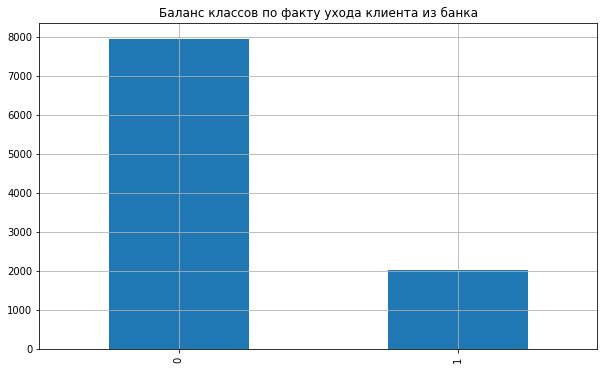

In [15]:
(
    data['Exited'].value_counts()
               .plot(kind='bar', grid=True,figsize=(10,6),
                     title='Баланс классов по факту ухода клиента из банка')
);

***Вывод:*** наблюдается дисбаланс классов в пользу оставшихся клиентов, что может привести к ошибочным прогнозам модели в пользу более весомого класса.

### DecisionTreeClassifier

In [16]:
f1_best = 0
depth_best = 0

for depth in range(7, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(f_train, t_train)
    prediction = model.predict(f_valid)
    f1 = f1_score(t_valid, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

Max depth 7 F1-score 0.5578512396694214


In [17]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(f_train, t_train)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))


Accuracy : 0.8573333333333333
Precision : 0.7627118644067796
Recall : 0.43973941368078173
F1 : 0.5578512396694214
AUC-ROC:  0.815121323900822


### RandomForestClassifier

In [18]:
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range (60, 63):
    for depth in range(10, 12):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model.fit(f_train, t_train)
        prediction = model.predict(f_valid)
        f1 = f1_score(t_valid, prediction)
        if f1 > f1_best:
            f1_best = f1
            estim_best = estim
            depth_best = depth
        

print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

n_estimators = 61 Max depth 10 F1-score 0.5911949685534591


In [19]:
model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=61)
model.fit(f_train, t_train)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))


Accuracy : 0.87
Precision : 0.8294117647058824
Recall : 0.4592833876221498
F1 : 0.5911949685534591
AUC-ROC:  0.856352610641336


### LogisticRegression

In [20]:
model = LogisticRegression(random_state=12345) 
model.fit(f_train, t_train)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))


Accuracy : 0.808
Precision : 0.5855855855855856
Recall : 0.21172638436482086
F1 : 0.31100478468899523
AUC-ROC:  0.7760006116024256


**ВЫВОД:**

Для всех моделей наблюдаем, что значение *recall* меньше *precision*; поэтому получаем небольшое значение *f1-меры.*

## Борьба с дисбалансом

Обучим модели ***с учетом баланса классов*** и посмотрим как изменились метрики. Рассмотрим несколько способов борьбы с дисбалансом:
- добавим параметр *class_weight = 'balanced'* в модели
- техника *Upsampling*
- техника *Downsampling*

### Параметр class_weight = 'balanced'

*Модель решающего дерева*

In [21]:
#поиск гиперпараметров с учетом баланса классов
f1_best = 0
depth_best = 0

for depth in range(7, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(f_train, t_train)
    prediction = model.predict(f_valid)
    f1 = f1_score(t_valid, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

Max depth 8 F1-score 0.5513654096228867


In [22]:
#модель решающего дерева с учетом баласном классов и оптимальной глубиной
model = DecisionTreeClassifier(random_state=12345, max_depth=8, class_weight='balanced')
model.fit(f_train, t_train)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))
fpr_tree, tpr_tree, thresholds = roc_curve(t_valid, probabilities_valid) #заготовка для визуализации roc_curve


Accuracy : 0.77
Precision : 0.4588744588744589
Recall : 0.6905537459283387
F1 : 0.5513654096228867
AUC-ROC:  0.7803637396211888


*Модель случайного леса*

In [23]:
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range (60, 63):
    for depth in range(10, 12):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345, class_weight='balanced')
        model.fit(f_train, t_train)
        prediction = model.predict(f_valid)
        f1 = f1_score(t_valid, prediction)
        if f1 > f1_best:
            f1_best = f1
            estim_best = estim
            depth_best = depth
        

print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

n_estimators = 61 Max depth 10 F1-score 0.6268174474959614


In [24]:
model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=61, class_weight='balanced')
model.fit(f_train, t_train)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))
fpr_forest, tpr_forest, thresholds = roc_curve(t_valid, probabilities_valid)


Accuracy : 0.846
Precision : 0.6217948717948718
Recall : 0.6319218241042345
F1 : 0.6268174474959614
AUC-ROC:  0.859574444847932


*Модель логистической регрессии*

In [25]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=100, class_weight='balanced') 
model.fit(f_train, t_train)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))
fpr_log, tpr_log, thresholds = roc_curve(t_valid, probabilities_valid)


Accuracy : 0.7133333333333334
Precision : 0.3915343915343915
Recall : 0.7231270358306189
F1 : 0.5080091533180777
AUC-ROC:  0.7801480405514251


**ВЫВОД:**  Самая лучшая модель - ***RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=61, class_weight='balanced'), f1 = 0.62, recall = 0.63.***

### Техника Upsampling

Техника *upsampling* делает объекты редкого класса не такими редкими в данных.

In [27]:
oversample = SMOTE(random_state=12345)

f_train_up, t_train_up = oversample.fit_resample(f_train, t_train)

Обучим модели на новых данных и посмотрим как изменяться метрики.

In [28]:
#поиск гиперпараметров на новых данных
f1_best = 0
depth_best = 0

for depth in range(7, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(f_train_up, t_train_up)
    prediction = model.predict(f_valid)
    f1 = f1_score(t_valid, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

Max depth 7 F1-score 0.5643835616438356


In [29]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)

model.fit(f_train_up, t_train_up)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))


Accuracy : 0.788
Precision : 0.48699763593380613
Recall : 0.6710097719869706
F1 : 0.5643835616438356
AUC-ROC:  0.8002845043426502


In [30]:
estim_best = 0
depth_best = 0

for estim in range (60, 63):
    for depth in range(10, 12):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model.fit(f_train_up, t_train_up)
        prediction = model.predict(f_valid)
        f1 = f1_score(t_valid, prediction)
        if f1 > f1_best:
            f1_best = f1
            estim_best = estim
            depth_best = depth
        

print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

n_estimators = 62 Max depth 10 F1-score 0.622754491017964


In [31]:
model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=62)

model.fit(f_train_up, t_train_up)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))


Accuracy : 0.832
Precision : 0.5761772853185596
Recall : 0.6775244299674267
F1 : 0.622754491017964
AUC-ROC:  0.8496659394786635


In [32]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=100)

model.fit(f_train_up, t_train_up)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))


Accuracy : 0.712
Precision : 0.38656987295825773
Recall : 0.6938110749185668
F1 : 0.4965034965034965
AUC-ROC:  0.7722873111609251


**ВЫВОД:**  

Самая удачная модель - ***RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=62)***, обученная на сбалансированных данных техникой ***upsample; f1-мера = 0.62, recall = 0.67***.

### Downsampling

Техника *downsampling* делает объекты частого класса не такими частыми в данных.

In [33]:
undersample = RandomUnderSampler(random_state=12345)
f_train_down, t_train_down = undersample.fit_resample(f_train, t_train)

In [34]:
#поиск гиперпараметров на новых данных
f1_best = 0
depth_best = 0

for depth in range(7, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(f_train_down, t_train_down)
    prediction = model.predict(f_valid)
    f1 = f1_score(t_valid, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

Max depth 7 F1-score 0.5331833520809899


In [35]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)

model.fit(f_train_down, t_train_down)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))



Accuracy : 0.7233333333333334
Precision : 0.4072164948453608
Recall : 0.7719869706840391
F1 : 0.5331833520809899
AUC-ROC:  0.8036592391556611


In [36]:
estim_best = 0
depth_best = 0

for estim in range (60, 63):
    for depth in range(10, 12):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model.fit(f_train_down, t_train_down)
        prediction = model.predict(f_valid)
        f1 = f1_score(t_valid, prediction)
        if f1 > f1_best:
            f1_best = f1
            estim_best = estim
            depth_best = depth
        

print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

n_estimators = 60 Max depth 10 F1-score 0.5956907477820026


In [37]:
model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=60)

model.fit(f_train_down, t_train_down)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))


Accuracy : 0.7873333333333333
Precision : 0.487551867219917
Recall : 0.7654723127035831
F1 : 0.5956907477820026
AUC-ROC:  0.8506106467968689


In [38]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=100)

model.fit(f_train_down, t_train_down)
predictions = model.predict(f_valid)
probabilities_valid = model.predict_proba(f_valid)[:, 1]

print('')
print('Accuracy :', accuracy_score(t_valid, predictions))
print('Precision :', precision_score(t_valid, predictions))
print('Recall :', recall_score(t_valid, predictions))
print('F1 :', f1_score(t_valid, predictions))
print("AUC-ROC: ", roc_auc_score(t_valid, probabilities_valid))


Accuracy : 0.7126666666666667
Precision : 0.39045936395759717
Recall : 0.7198697068403909
F1 : 0.5063001145475372
AUC-ROC:  0.7810927478696306


***Вывод:*** метод не подходит, метрики заметно испортились для всех моделей.

**ВЫВОД:**  
    Для дальнейшей работы мы выбираем модель - ***RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=61, class_weight='balanced')***, которая показывает самую лучшие метрику ***f1 = 0.62.***

### Визуализация AUC-ROC

Построим ROC-кривую для всех моделей, в который мы добавили гиперпараметр class_weight='balanced'.

<Figure size 432x288 with 0 Axes>

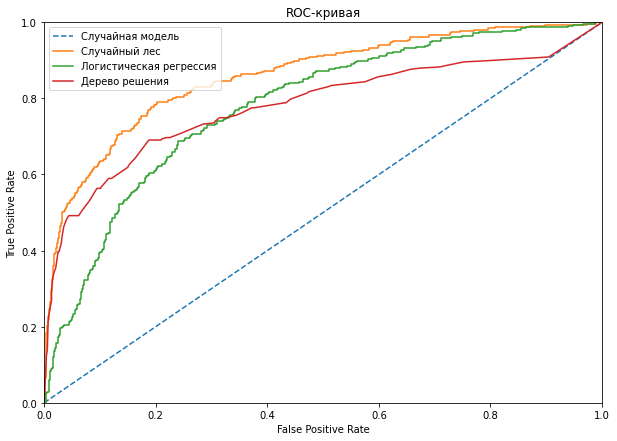

In [39]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_forest,tpr_forest)
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left')
plt.show()

***Вывод:*** на графике видно, что модель случайного леса самая удачная т.к. кривая ближе всех к 1.

## Тестирование модели

Обучим нашу самую лучшую модель:

In [40]:
best_model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=61, class_weight='balanced')

best_model.fit(f_train, t_train)
prediction = best_model.predict(f_valid)

print('Accuracy', accuracy_score(t_valid, prediction))
print('Precision', precision_score(t_valid, prediction))
print('Recall', recall_score(t_valid, prediction))
print('F1', f1_score(t_valid, prediction))
probabilities_valid = best_model.predict_proba(f_valid)[:, 1]
print("AUC-ROC", roc_auc_score(t_valid, probabilities_valid))

Accuracy 0.846
Precision 0.6217948717948718
Recall 0.6319218241042345
F1 0.6268174474959614
AUC-ROC 0.859574444847932


Проверим лучшую модель на адекватность, сравнив с константной моделью.

In [41]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(t_valid))

#Сравним показатель точности (accuracy_score) константной модели и лучшей модели
print('accuracy_score константой модели:', accuracy_score(t_valid, target_predict_constant))
print('accuracy_score лучшей модели:', accuracy_score(t_valid, prediction))

#Сравним AUC-ROC, остальные метрики не работают на константной модели.
print('AUC-ROC константой модели:', roc_auc_score(t_valid, target_predict_constant))
print('AUC-ROC лучшей модели:', roc_auc_score(t_valid, probabilities_valid))

accuracy_score константой модели: 0.7953333333333333
accuracy_score лучшей модели: 0.846
AUC-ROC константой модели: 0.5
AUC-ROC лучшей модели: 0.859574444847932


**Вывод:**  модель прошла проверку на адекватность.

Протестируем модель:

In [42]:
prediction = best_model.predict(f_test)

print('Accuracy', accuracy_score(t_test, prediction))
print('Precision', precision_score(t_test, prediction))
print('Recall', recall_score(t_test, prediction))
print('F1', f1_score(t_test, prediction))
probabilities_test = best_model.predict_proba(f_test)[:, 1]
print("AUC-ROC", roc_auc_score(t_test, probabilities_test))
fpr, tpr, thresholds = roc_curve(t_test, probabilities_test)

Accuracy 0.8286666666666667
Precision 0.5945121951219512
Recall 0.6112852664576802
F1 0.6027820710973724
AUC-ROC 0.8559612888498404


***Вывод:*** выбранная модель показывает приемлемый результат на тестовой выборке: ***f1-мера = 0.6.***

<Figure size 432x288 with 0 Axes>

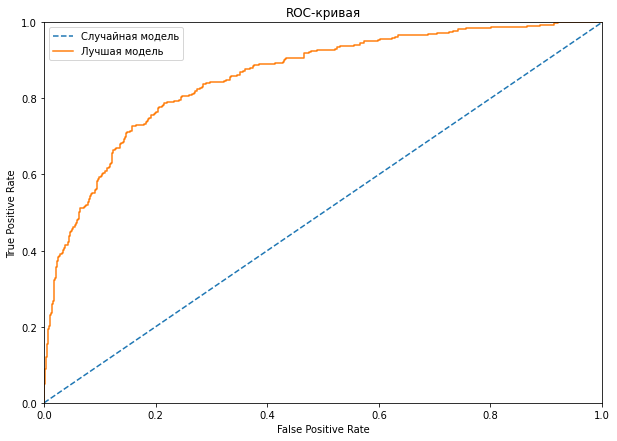

In [43]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Лучшая модель'),
           loc= 'upper left') 
plt.show()

## ВЫВОД

В ходе исследования мы получили самую лучшую модель - ***RRandomForestClassifier(random_state=12345, max_depth=10, n_estimators=61, class_weight='balanced')***, с ***f1-мерой = 0.62*** на валидационной выборке.  

Модель показывает приемлемый результат на тестовой выборке: ***f1-мера = 0.6***; модель хорошо находит ушедших клиентов на тестовой выборке *(recall = 0.61)*, и сможет весьма хорошо предсказать уход клиента из банка *(precision = 0.59)*.  

Модель выдержала проверку на адекватность.